### Задачи проекта

* Посмотреть как ведут себя магазины в течение дня. Кто отключается, кто продолжает работу и как это влияет на остальных. Построить график.
*  Посмотреть как распределяются звонки в течение дня. Правда ли, что в вечернее время никто не звонит.
* Посмотреть в какое время чаще всего делают клики.
* Проверить гипотезу о том, что после 18-00 не звонят.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns

In [162]:
shop_1 = pd.read_excel('18602214_clicks.xlsx')
shop_2 = pd.read_excel('19074357_clicks.xlsx')
shop_3 = pd.read_excel('21223632_clicks.xlsx')
shop_4 = pd.read_excel('38025008_clicks.xlsx')
shop_5 = pd.read_excel('42078647_clicks.xlsx')
shop_6 = pd.read_excel('57656624_clicks.xlsx')

In [163]:
calls_1 = pd.read_excel('Calls_18602214.xlsx')
calls_2 = pd.read_excel('Calls_19074357.xlsx')
calls_3 = pd.read_excel('Calls_21223632.xlsx')
calls_4 = pd.read_excel('Calls_38025008.xlsx')
calls_5 = pd.read_excel('Calls_42078647.xlsx')
calls_6 = pd.read_excel('Calls_57656624.xlsx')


In [164]:
shop_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Время клика           1819 non-null   object 
 1   Категория             1819 non-null   object 
 2   Ссылка на объявление  1819 non-null   object 
 3   Цена                  1819 non-null   int64  
 4   Стоимость клика       1819 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 71.2+ KB


In [165]:
shop_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Время клика           1270 non-null   object
 1   Категория             1270 non-null   object
 2   Ссылка на объявление  1270 non-null   object
 3   Цена                  1270 non-null   int64 
 4   Стоимость клика       1270 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 49.7+ KB


In [166]:
shop_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327 entries, 0 to 4326
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Время клика           4327 non-null   object 
 1   Категория             4327 non-null   object 
 2   Ссылка на объявление  4327 non-null   object 
 3   Цена                  4327 non-null   int64  
 4   Стоимость клика       4327 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 169.1+ KB


In [167]:
shop_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Время клика           980 non-null    object 
 1   Категория             980 non-null    object 
 2   Ссылка на объявление  980 non-null    object 
 3   Цена                  980 non-null    int64  
 4   Стоимость клика       980 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.4+ KB


In [168]:
shop_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Время клика           932 non-null    object 
 1   Категория             932 non-null    object 
 2   Ссылка на объявление  932 non-null    object 
 3   Цена                  932 non-null    int64  
 4   Стоимость клика       931 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 36.5+ KB


In [169]:
shop_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Время клика           450 non-null    object 
 1   Категория             450 non-null    object 
 2   Ссылка на объявление  450 non-null    object 
 3   Цена                  450 non-null    int64  
 4   Стоимость клика       450 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.7+ KB


### Вывод:
Мы ознакомились с данными и теперь можем приступить к предобработке.

## Предобработка данных

Поскольку пропусков в данных у нас нет, судя по предыдущему пункту, то сразу объединить таблицы для дальнейшейно удобства. Плюс зададим каждой таблице ID.

In [170]:
col = 1
for i in [shop_1, shop_2, shop_3, shop_4, shop_5, shop_6]:
    i['id'] = 'id_00{}'.format(col)
    col += 1
        
shops = pd.concat([shop_1, shop_2, shop_3, shop_4, shop_5, shop_6],axis = 0)

Удалим столбец с персональными данными и сразу для удобства переименуем оставшиеся.

In [171]:
shops = shops.drop(['Ссылка на объявление'], axis= True)

shops.columns = ['time', 'category', 'price', 'count', 'id']

Теперь переведем дату в соответствующий формат.

In [172]:
shops['time'] =pd.to_datetime(shops['time'], format='%d.%m.%Y %H:%M:%S', dayfirst=False)

shops

,time,category,price,count,id
0,2021-09-13 00:04:47,Турбокомпрессор,44000,6.8,id_001
1,2021-09-13 00:35:43,Щётки генератора,450,4.5,id_001
2,2021-09-13 00:41:19,Стартер,6350,6.7,id_001
3,2021-09-13 00:46:19,Съемник подшипников,7750,4.5,id_001
4,2021-09-13 00:55:39,Ремкомплект рулевой рейки,1200,4.5,id_001
...,...,...,...,...,...
445,2021-09-19 23:48:53,Аккумуляторы,5549,2.3,id_006
446,2021-09-19 23:49:02,Генератор,20259,2.1,id_006
447,2021-09-19 23:49:33,Аккумуляторы,11647,2.3,id_006
448,2021-09-19 23:50:33,Аккумуляторы,6122,2.3,id_006


Теперь тоже самое можно сделать и с другой таблицей по звонкам.

In [173]:
col = 1
for i in [calls_1, calls_2, calls_3, calls_4, calls_5, calls_6]:
    i['id'] = 'id_00{}'.format(col)
    col += 1
        
calls = pd.concat([calls_1, calls_2, calls_3, calls_4, calls_5, calls_6],axis = 0)


Вновь удалим лишние столбцы с персональными данными.

In [174]:
calls = calls.drop(['source', 'proxy', 'target'], axis= True)
calls.columns = ['time', 'result', 'talk_time', 'id']

In [175]:
calls['time'] =pd.to_datetime(calls['time'], format='%Y-%m-%dT%H:%M:%S', dayfirst=False)
#calls['time'].dt.round('30min')

In [176]:
calls

,time,result,talk_time,id
0,2021-09-19 18:30:27.168000+03:00,success,163,id_001
1,2021-09-19 17:30:34.203000+03:00,success,102,id_001
2,2021-09-19 16:55:52.198000+03:00,success,110,id_001
3,2021-09-19 16:24:21.138000+03:00,success,166,id_001
4,2021-09-19 15:09:24.320000+03:00,success,93,id_001
...,...,...,...,...
10,2021-09-15 22:00:28.716000+03:00,stop-caller,0,id_006
11,2021-09-15 17:48:36.018000+03:00,success,274,id_006
12,2021-09-14 09:53:03.048000+03:00,success,49,id_006
13,2021-09-13 19:26:31.729000+03:00,success,229,id_006


### Вывод:
Мы подготовили данные и теперь можно приступать к анализу.

## Исследовательский анализ данных

Поскольку кликов может быть много в короткий промежуток времени, то для удобства сделаем получасовые когорты для постраения графиков.

In [177]:
shops['hour'] = shops['time'].dt.round('H')
shops['day'] = pd.to_datetime((shops['time']).dt.date)

In [178]:
shops.sample(20)

,time,category,price,count,id,hour,day
632,2021-09-18 12:46:37,Комплект цепи ГРМ,7400,3.2,id_005,2021-09-18 13:00:00,2021-09-18
918,2021-09-14 10:57:04,Дефлектор бокового окна,5184,2.5,id_003,2021-09-14 11:00:00,2021-09-14
4144,2021-09-19 11:55:31,Дефлектор бокового окна,15066,2.5,id_003,2021-09-19 12:00:00,2021-09-19
857,2021-09-16 18:33:15,Приводной вал,4476,4.0,id_002,2021-09-16 19:00:00,2021-09-16
616,2021-09-15 19:28:51,Шаровая опора,371,4.0,id_002,2021-09-15 19:00:00,2021-09-15
221,2021-09-14 14:17:51,Капот,9700,2.1,id_004,2021-09-14 14:00:00,2021-09-14
2191,2021-09-16 12:04:22,Сетка для багажа,4969,2.7,id_003,2021-09-16 12:00:00,2021-09-16
33,2021-09-13 13:27:43,Рулевая тяга,3400,3.2,id_005,2021-09-13 13:00:00,2021-09-13
1523,2021-09-15 12:03:29,Подлокотник,2400,2.7,id_003,2021-09-15 12:00:00,2021-09-15
252,2021-09-14 04:31:44,Фильтр масляный,155,4.0,id_002,2021-09-14 05:00:00,2021-09-14


Возьмем в качестве примера один из дней и построим график по нему.

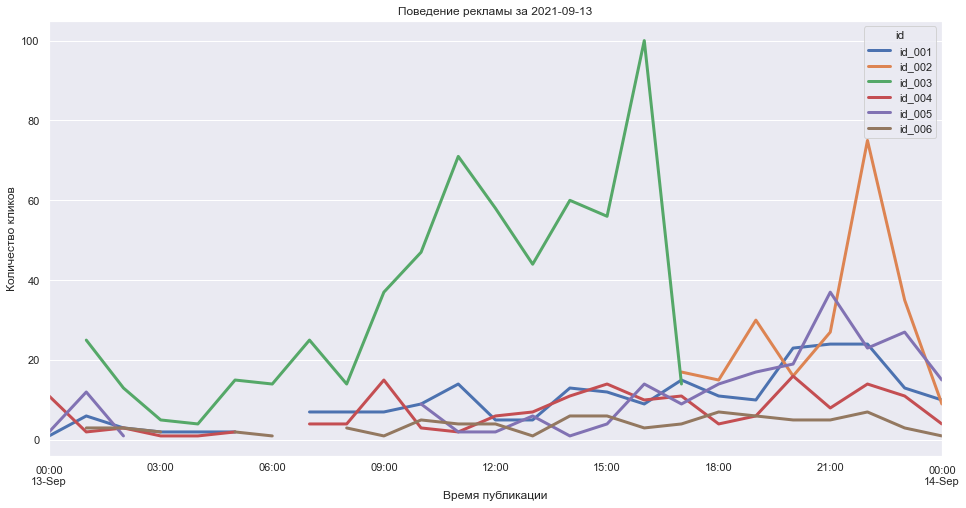

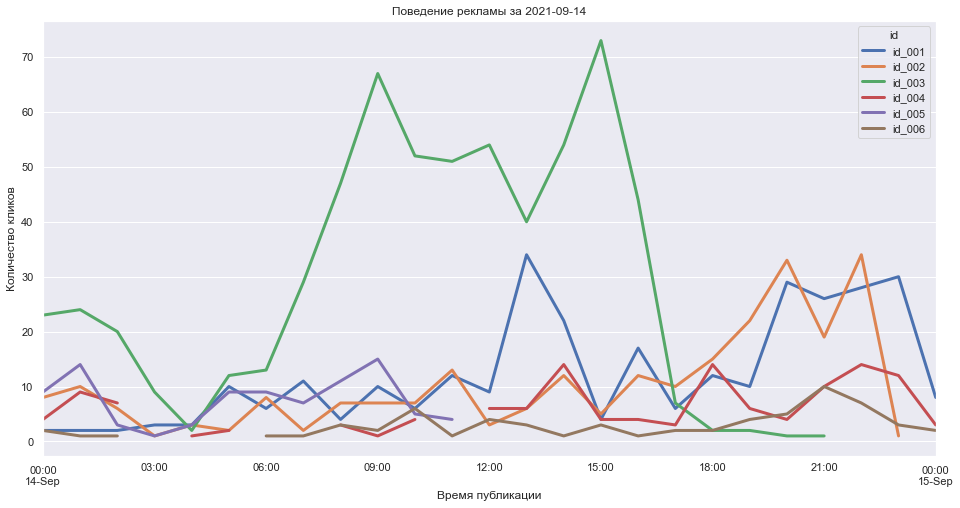

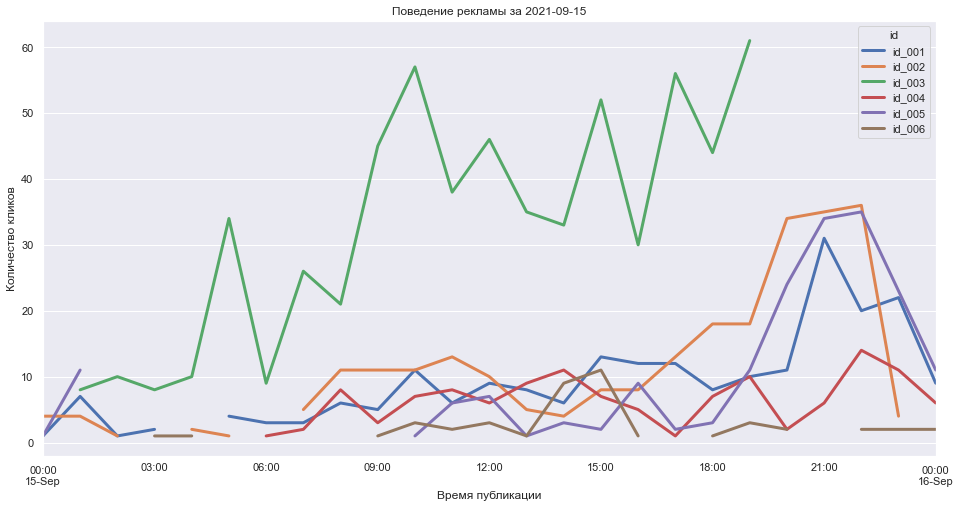

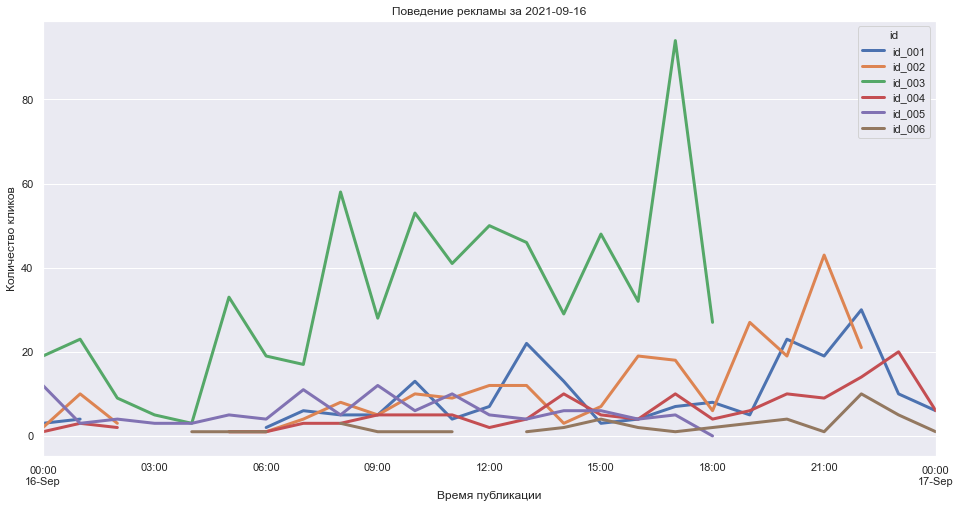

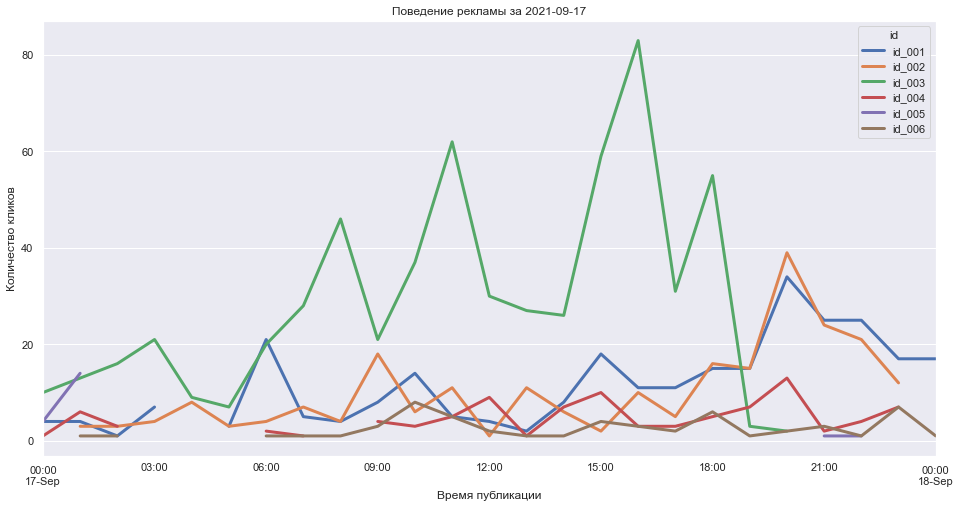

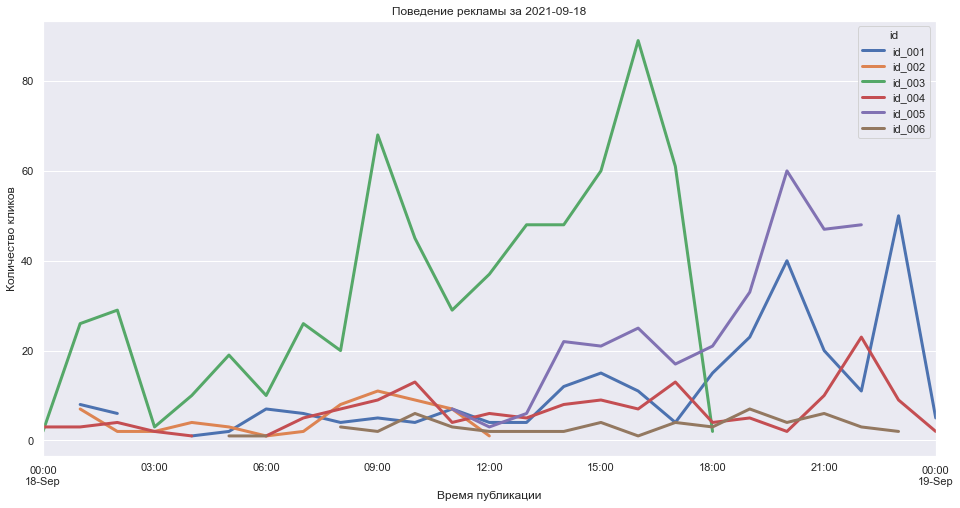

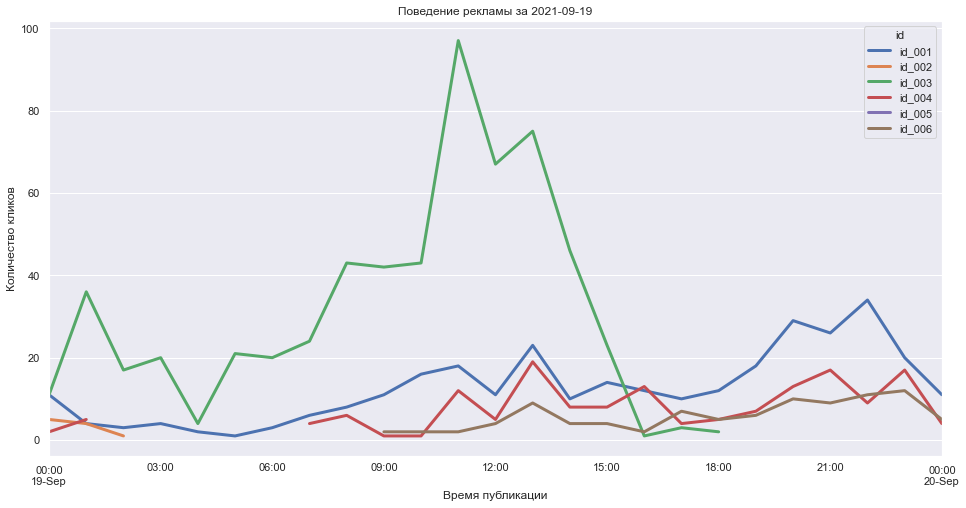

In [179]:
all_day = (shops['day'].dt.strftime('%Y-%m-%d')).unique()

for i in (all_day):
    day = shops.loc[shops['day'] == i].pivot_table(index='hour', columns='id', values = 'count', aggfunc = 'count')
    day.plot(title='Поведение рекламы за {}'.format(i), figsize = (16,8), linewidth = 3, grid = True).set(xlabel="Время публикации", ylabel="Количество кликов")



Судя по имеющимся графикам за всю неделю, когда реклама отключается у магазина `id_003`, то это влияет и на все другие магазины,  поскольку среднее количество кликов у них увеличивается.

Теперь посмотрим, всегда ли ставки влияют на число кликов. Для этого посчитаем Медианную ставку за клик по каждому магазину на все дни.

In [180]:
shops.pivot_table(index='day', columns='id', values = 'count', aggfunc = 'median')

id,id_001,id_002,id_003,id_004,id_005,id_006
day,,,,,,
2021-09-13,6.7,4.0,2.5,2.5,3.2,2.1
2021-09-14,6.5,4.0,2.5,2.5,3.2,2.1
2021-09-15,5.1,4.0,2.5,2.5,3.2,2.1
2021-09-16,6.5,4.0,2.5,2.5,3.2,2.3
2021-09-17,6.5,4.0,2.5,2.5,3.2,2.3
2021-09-18,6.7,4.0,2.5,2.5,3.2,2.3
2021-09-19,4.5,4.0,2.5,2.5,3.2,2.3


Как видно по медианным ставкам, что не всегда пользователи совершают клик по объявлению, когда магазин на него дает высокую ставку за клик. Магазин id_003, которые имеет больше всего кликов, использует средние ставки 2.5 рубля. Это нам говорит о том, что или у магазина есть какой-то уникальный ассортимент, которого нет у других, или цены на его позиции ниже, чем у конкурентов.

В остальном же логика "Чем выше ставка за клик, тем больше просмотров" работает как часы. 

Теперь посмотрим на распределение звонков.

In [181]:
calls

,time,result,talk_time,id
0,2021-09-19 18:30:27.168000+03:00,success,163,id_001
1,2021-09-19 17:30:34.203000+03:00,success,102,id_001
2,2021-09-19 16:55:52.198000+03:00,success,110,id_001
3,2021-09-19 16:24:21.138000+03:00,success,166,id_001
4,2021-09-19 15:09:24.320000+03:00,success,93,id_001
...,...,...,...,...
10,2021-09-15 22:00:28.716000+03:00,stop-caller,0,id_006
11,2021-09-15 17:48:36.018000+03:00,success,274,id_006
12,2021-09-14 09:53:03.048000+03:00,success,49,id_006
13,2021-09-13 19:26:31.729000+03:00,success,229,id_006


In [182]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                                
---  ------     --------------  -----                                
 0   time       286 non-null    datetime64[ns, pytz.FixedOffset(180)]
 1   result     286 non-null    object                               
 2   talk_time  286 non-null    int64                                
 3   id         286 non-null    object                               
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), int64(1), object(2)
memory usage: 11.2+ KB


Кластеризуем события по дате и часам.

In [184]:
calls['time'] =pd.to_datetime(calls['time'], unit='s')
calls['hour'] = calls['time'].dt.round('H')
calls['day'] = pd.to_datetime((calls['time']).dt.date)
calls['data'] = (calls['time']).dt.time

In [185]:
calls

,time,result,talk_time,id,hour,day,data
0,2021-09-19 18:30:27.168000+03:00,success,163,id_001,2021-09-19 19:00:00+03:00,2021-09-19,18:30:27.168000
1,2021-09-19 17:30:34.203000+03:00,success,102,id_001,2021-09-19 18:00:00+03:00,2021-09-19,17:30:34.203000
2,2021-09-19 16:55:52.198000+03:00,success,110,id_001,2021-09-19 17:00:00+03:00,2021-09-19,16:55:52.198000
3,2021-09-19 16:24:21.138000+03:00,success,166,id_001,2021-09-19 16:00:00+03:00,2021-09-19,16:24:21.138000
4,2021-09-19 15:09:24.320000+03:00,success,93,id_001,2021-09-19 15:00:00+03:00,2021-09-19,15:09:24.320000
...,...,...,...,...,...,...,...
10,2021-09-15 22:00:28.716000+03:00,stop-caller,0,id_006,2021-09-15 22:00:00+03:00,2021-09-15,22:00:28.716000
11,2021-09-15 17:48:36.018000+03:00,success,274,id_006,2021-09-15 18:00:00+03:00,2021-09-15,17:48:36.018000
12,2021-09-14 09:53:03.048000+03:00,success,49,id_006,2021-09-14 10:00:00+03:00,2021-09-14,09:53:03.048000
13,2021-09-13 19:26:31.729000+03:00,success,229,id_006,2021-09-13 19:00:00+03:00,2021-09-13,19:26:31.729000


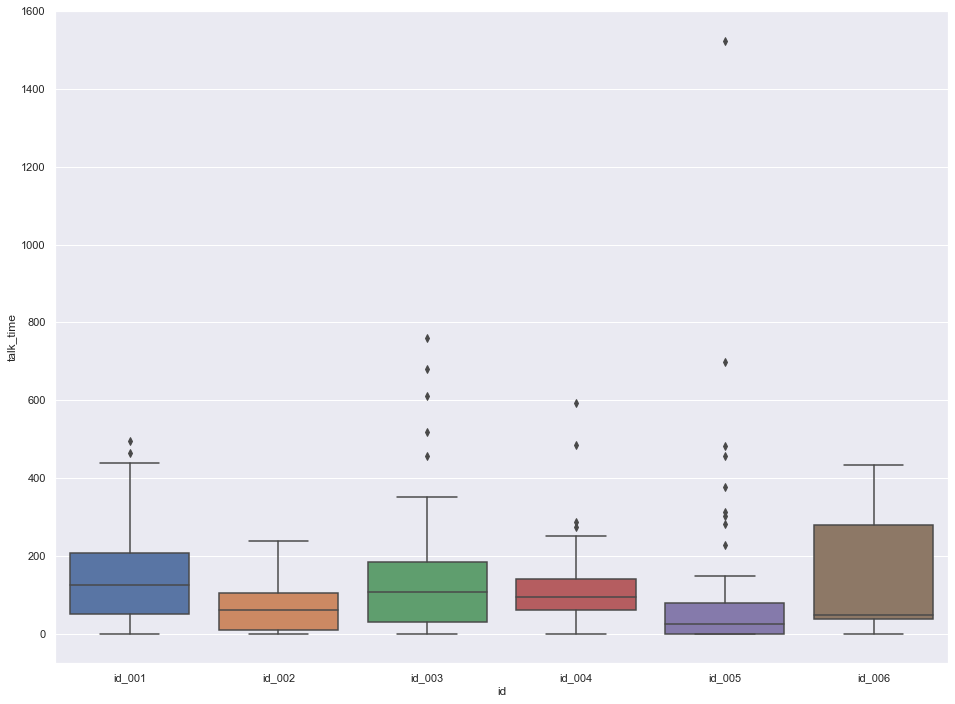

In [132]:
sns.set(rc={'figure.figsize':(16,12)})
sns.boxplot(data = calls, y='talk_time', x = 'id')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

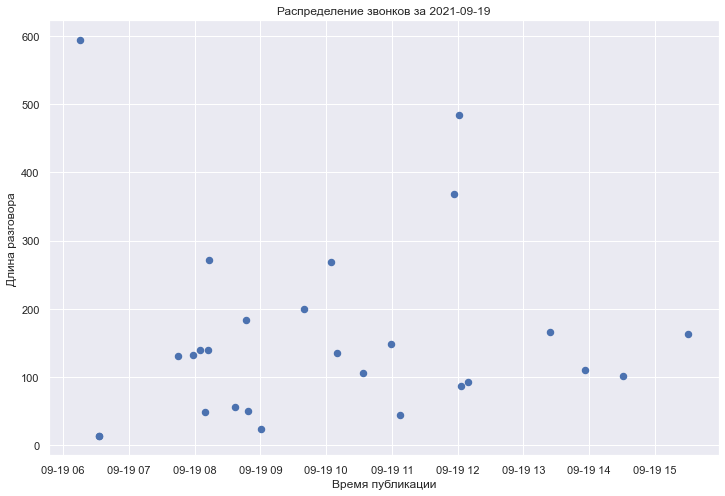

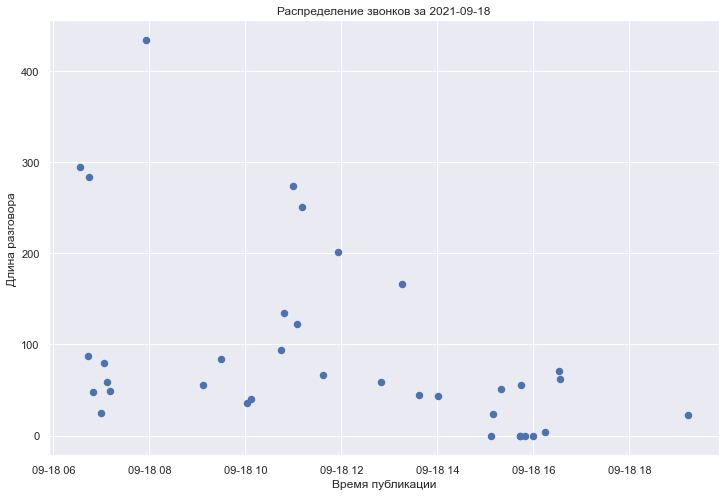

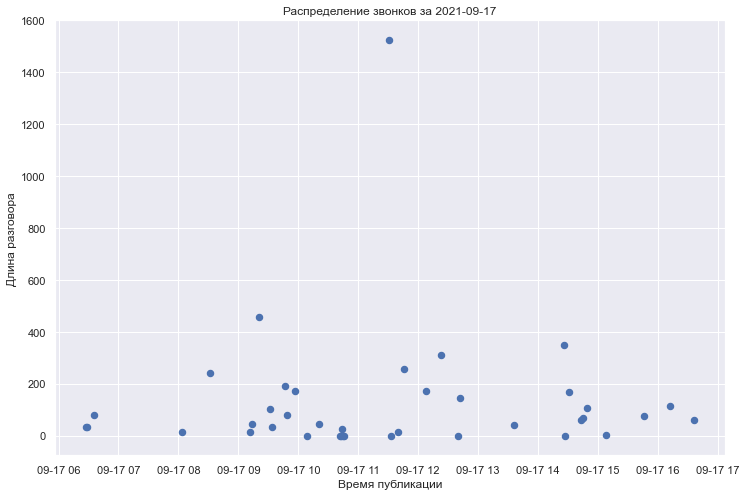

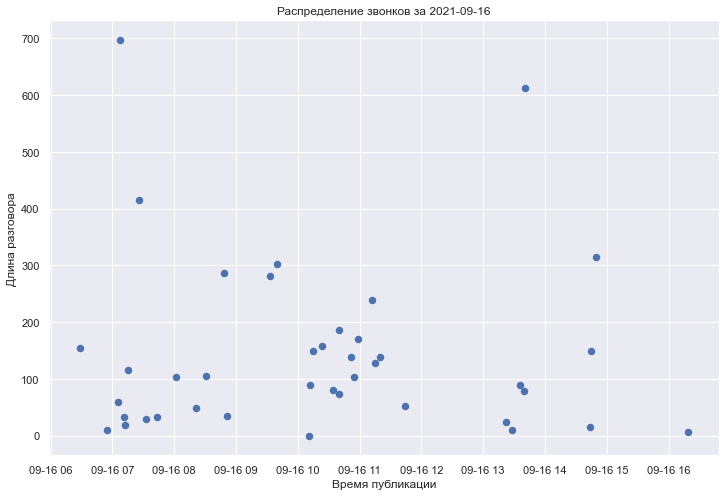

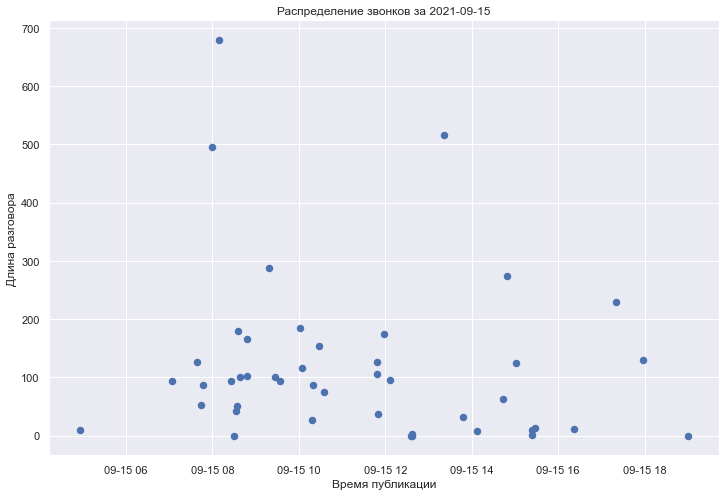

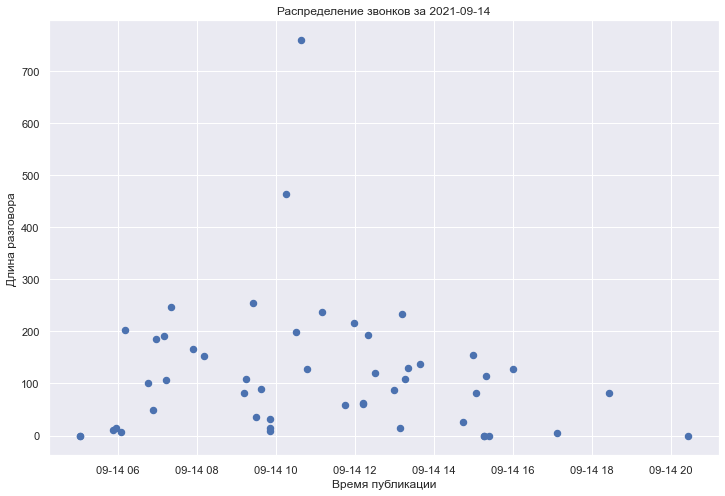

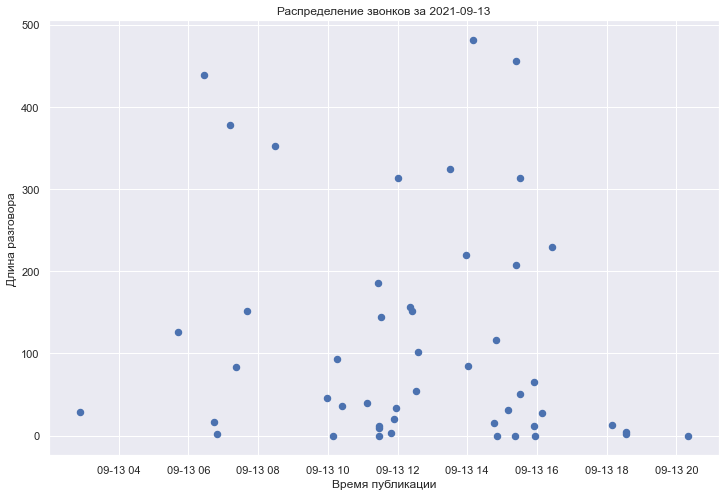

In [190]:
all_calls = (calls['day'].dt.strftime('%Y-%m-%d')).unique()

for i in (all_calls):
    day_calls = calls.loc[calls['day'] == i].sort_values(by = 'time', ascending = False)
    day_calls.plot(x='time', y='talk_time', kind='scatter',title='Распределение звонков за {}'.format(i), figsize = (12,8), linewidth = 3, grid = True).set(xlabel="Время публикации", ylabel="Длина разговора")

#calls.plot(x='time', y='talk_time', kind='scatter', title='Диаграмма рассеиния пользовательских оценок в зависимости от дохода', figsize = (14,8))